In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import time
import datetime
from typing import Dict, Tuple

# Load data

In [3]:
training_values = pd.read_csv("../data/training_set_values.csv")
training_labels = pd.read_csv("../data/training_set_labels.csv")

test_values = pd.read_csv("../data/test_set_values.csv")

In [4]:
dataset = training_values.join(other = training_labels.set_index('id'), on='id')

In [5]:
dataset.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


In [6]:
dataset.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [7]:
dataset.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


# Prepare data

In [8]:
# dataset = dataset.drop(['id'], axis=1)

## Geodata

In [9]:
def plot_geodata(dataset: pd.DataFrame): 
    gdf = geopandas.GeoDataFrame(training_values.copy(), 
                                 geometry=geopandas.points_from_xy(dataset.longitude, dataset.latitude))
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    ax = world[world.continent == 'Africa'].plot(color='white', edgecolor='black')

    gdf.plot(ax=ax, color='red',  figsize=(64, 64))

    plt.show()

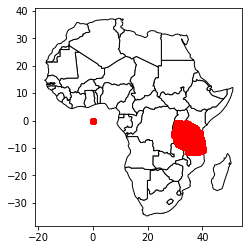

In [10]:
plot_geodata(dataset)

### Dataset has zero-longitude data, replace with mean values
Gives several % of accuracy boost

In [11]:
def replace_zero_longitude_data(dataset: pd.DataFrame):
    dataset['longitude'] = dataset['longitude'].replace(0, dataset['longitude'].mean())

In [12]:
replace_zero_longitude_data(dataset)

In [13]:
dataset.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,35.116960,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,2.573963,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,29.607122,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.354079,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


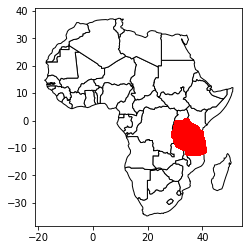

In [14]:
plot_geodata(dataset)

## Convert booleans to string
Easier to work with later, handle as generic category

In [15]:
def convert_column_to_string(dataset, column_name):
    dataset[column_name] = dataset[column_name].astype(str)

In [16]:
convert_column_to_string(dataset, 'permit')
convert_column_to_string(dataset, 'public_meeting')

## Check imbalance
->Fixing imbalance causes overfitting, actually reducing accuracy

In [17]:
#dataset['status_group'].value_counts()

### Increase amount of 'functional needs repair' data

In [18]:
#dataset_needs_repair = dataset[dataset['status_group'] == 'functional needs repair']

#for _ in range(5):
#    dataset = dataset.append(dataset_needs_repair)

In [19]:
#dataset['status_group'].value_counts()

## List categorical columns

In [20]:
categorical_columns = ['funder',
       'installer', 'wpt_name', 
       'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting',
       'scheme_management', 
       'scheme_name', 
       'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group',
        
       'status_group'] #result column

##  Handle N/A values

In [21]:
dataset.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Replace other NaN with explicit 'n/a' value

In [22]:
def replace_na_value(dataset: pd.DataFrame):
    for column in categorical_columns:
        if column not in dataset.columns:
            continue
        
        dataset[column] = dataset[column].fillna('n/a')

In [23]:
replace_na_value(dataset)

## Encode categorical columns

In [24]:
def encode_categorical_columns(dataset: pd.DataFrame) -> Dict[str, LabelEncoder]:
    encoders = {} 
    for column in categorical_columns:
        if column not in dataset.columns:
            continue
            
        le = LabelEncoder()
        le.fit(dataset[column])

        dataset[column] = le.transform(dataset[column])
        encoders[column]= le
        
    return encoders

In [25]:
encoders = encode_categorical_columns(dataset)

## Handle date columns
Convert to epoch time

In [26]:
date_columns = ['date_recorded']

In [27]:
def convert_date_columns_to_epoch(dataset: pd.DataFrame, timestamp_format="%Y-%m-%d"):
    for column in date_columns:
        dataset[column] = [ datetime.datetime.strptime(x, timestamp_format).timestamp() for x in dataset[column]]

In [28]:
convert_date_columns_to_epoch(dataset)

## Drop excess columns

### Drop 'scheme_name' column since most data is absent
->The idea was interesting, but apparently causes ~5% accuracy drop

In [29]:
# dataset.drop('scheme_name', axis=1, inplace=True)

### Drop 'recorded_by' because it has only one category value

In [30]:
def drop_recorded_by(dataset: pd.DataFrame):
    dataset.drop('recorded_by', axis=1, inplace=True)

In [31]:
drop_recorded_by(dataset)

### Drop columns which can be derived from other columns
- https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
- https://en.wikipedia.org/wiki/Uncertainty_coefficient

In [32]:
def drop_derived_columns(dataset: pd.DataFrame):
    drop_columns = ['region', 
                    'extraction_type_group', 'extraction_type_class', 
                    'management_group', 
                    'payment', 
                    'quality_group', 
                    'quantity', 
                    'source_type', 'source_class', 
                    'waterpoint_type_group']
    dataset.drop(drop_columns,1, inplace=True)

In [33]:
drop_derived_columns(dataset)

## Scale/normalize all columns

In [34]:
def scale_columns(dataset: pd.DataFrame):
    scaler = StandardScaler()
    dataset = scaler.fit_transform(dataset)
    #dataset[values.columns] = scaler.fit_transform(dataset[dataset.columns])

In [35]:
scale_columns(dataset)

# Data prepared

# ===========

# Create function combining all data preparation

In [36]:
def prepare_dataset(dataset: pd.DataFrame) -> pd.DataFrame:
    replace_zero_longitude_data(dataset)

    convert_column_to_string(dataset, 'permit')
    convert_column_to_string(dataset, 'public_meeting')

    replace_na_value(dataset)

    encoders = encode_categorical_columns(dataset)
    convert_date_columns_to_epoch(dataset)

    drop_recorded_by(dataset)
    drop_derived_columns(dataset)

    scale_columns(dataset)
    
    return dataset, encoders

# Split dataset

In [37]:
def split_dataset(dataset: pd.DataFrame): 
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    return train_test_split(X, y, test_size=0.2, random_state = 0)

In [38]:
X_train, X_test, y_train, y_test = split_dataset(dataset)

# Train models

In [39]:
models_result = {}

In [40]:
def update_result_print(models_result, model_name, clf, X_test, y_test):
    accuracy = clf.score(X_test, y_test)

    models_result[model_name] = accuracy
    print(f'"{model_name}" has accuracy: {accuracy}') 

In [41]:
def plot_features_importances(classifier, X_train):
    series = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=True)
    series = series.plot(kind='barh', figsize=(10,10))
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.show()

## Random forest

In [42]:
def random_forest(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(max_depth=25, n_estimators = 42*5, criterion = 'entropy', random_state = 0)

    clf.fit(X_train, y_train)
    
    return clf

"Random forest" has accuracy: 0.811952861952862


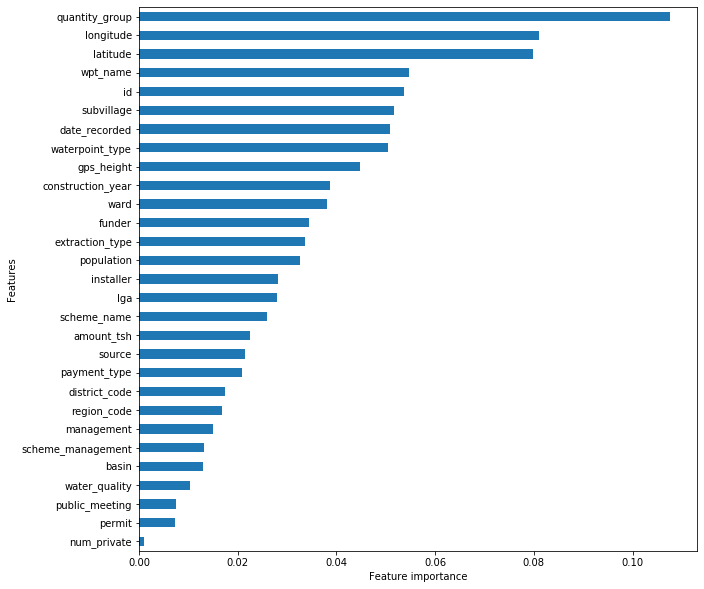

In [43]:
rf_clf = random_forest(X_train, y_train)
update_result_print(models_result, 'Random forest', rf_clf, X_test, y_test)
plot_features_importances(rf_clf, X_train)

## Naive Bayes

In [44]:
def gaussian_nb(X_train, y_train):
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    
    clf.fit(X_train, y_train)
    
    return clf

In [45]:
bayes_clf = gaussian_nb(X_train, y_train)
update_result_print(models_result, 'Naive Bayes', bayes_clf, X_test, y_test)
#plot_features_importances(bayes_clf, X_train)

"Naive Bayes" has accuracy: 0.41464646464646465


## K-Nearest Neighbors

In [46]:
def k_nearest(X_train, y_train):
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=3)
    
    clf.fit(X_train, y_train)
    
    return clf

In [47]:
k_nearest_clf = k_nearest(X_train, y_train)
update_result_print(models_result, 'K-Nearest Neighbors', k_nearest_clf, X_test, y_test)
#plot_features_importances(k_nearest_clf, X_train)

"K-Nearest Neighbors" has accuracy: 0.5341750841750842


## Multi-layer perceptron
TODO requires OneHotEncoder

In [48]:
def mlp(X_train, y_train):
    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(solver='adam', alpha=1e-5,
                        hidden_layer_sizes=(X_train.columns.size, X_train.columns.size), 
                        max_iter=10, activation='relu',
                        learning_rate_init=.1,
                        random_state=0)
    
    clf.fit(X_train, y_train)
    
    return clf

In [49]:
mlp_clf = mlp(X_train, y_train)
update_result_print(models_result, 'Multi-layer perceptron', mlp_clf, X_test, y_test)
#plot_features_importances(mlp_clf, X_train)

"Multi-layer perceptron" has accuracy: 0.5424242424242425


/Users/evilkhaoskat/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Support Vector Machine

In [50]:
def svm(X_train, y_train):
    from sklearn.svm import LinearSVC #better for large dataset then SVC
    clf = LinearSVC()
    
    clf.fit(X_train, y_train)
    
    return clf

In [51]:
svm_clf = svm(X_train, y_train)
update_result_print(models_result, 'Support Vector Machine', svm_clf, X_test, y_test)
#plot_features_importances(svm_clf, X_train)

"Support Vector Machine" has accuracy: 0.5424242424242425


/Users/evilkhaoskat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## XGBoost

In [52]:
def xgb(X_train, y_train):
    from xgboost import XGBClassifier
    clf = XGBClassifier(nthread=2, num_class=3,
                        min_child_weight=2, max_depth=13,
                        subsample=0.7, colsample_bytree = 0.9,
                        objective='multi:softmax')
    
    clf.fit(X_train, y_train)
    
    return clf

"XGBoost" has accuracy: 0.8117003367003367


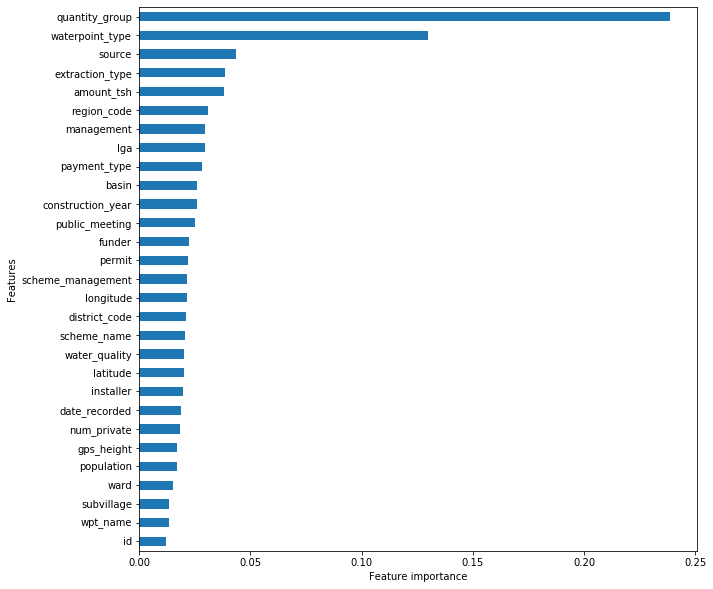

In [53]:
xgb_clf = xgb(X_train, y_train)
update_result_print(models_result, 'XGBoost', xgb_clf, X_test, y_test)
plot_features_importances(xgb_clf, X_train)

# Results

In [54]:
for k,v in sorted(models_result.items(), key=lambda entry:entry[1], reverse=True):
    print(f'{k:25s} {v}')

Random forest             0.811952861952862
XGBoost                   0.8117003367003367
Multi-layer perceptron    0.5424242424242425
Support Vector Machine    0.5424242424242425
K-Nearest Neighbors       0.5341750841750842
Naive Bayes               0.41464646464646465


# Use best model to predict test values

In [55]:
real_X = prepare_dataset(test_values)